[[1.00000000e+00 1.35335283e-01 2.26032941e-06 1.38879439e-11]
 [1.35335283e-01 1.00000000e+00 6.73794700e-03 2.26032941e-06]
 [2.26032941e-06 6.73794700e-03 1.00000000e+00 1.35335283e-01]
 [1.38879439e-11 2.26032941e-06 1.35335283e-01 1.00000000e+00]]
3
[2 0 0 1]
SpectralClustering(affinity='rbf', assign_labels='discretize', coef0=1,
                   degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
                   kernel_params=None, n_clusters=3, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=0)


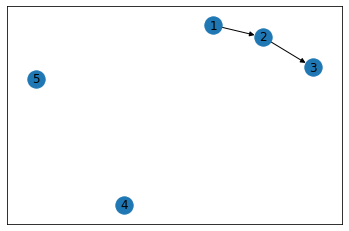

In [1]:
from sklearn.cluster import SpectralClustering
import numpy as np
X = np.array([[1, 2], [2, 3],
              [4, 4], [5, 5]])
clustering = SpectralClustering(n_clusters=3
                                ,
        assign_labels="discretize",
        random_state=0).fit(X)
print(clustering.affinity_matrix_)
print(clustering.n_clusters)
print(clustering.labels_)
print(clustering)
clustering

import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
G.add_edges_from(X)
nx.draw_networkx(G, with_labels=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


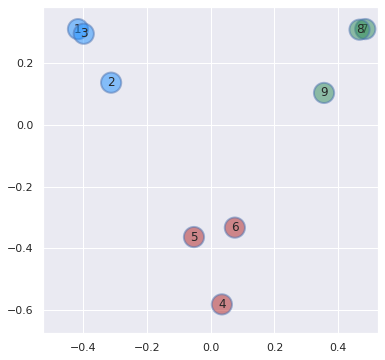

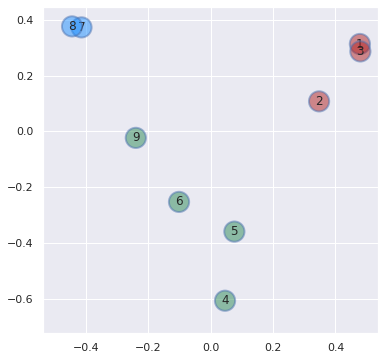

In [2]:
# exercise 11 Q3
import matplotlib as mpl
mpl.use("Agg")
import matplotlib.pyplot as pp

import numpy as np
from scipy.linalg import eigh
from scipy.sparse import coo_matrix
from sklearn.cluster import KMeans
import seaborn as sns

sns.set()
def plotcluster(ebds,epsilon=0.05):
  # Rotate embeddings such that node 4 is always embedded straight down
  four=ebds[3]
  alpha=np.arccos(-four[1]/np.linalg.norm(four))
  c,s=np.cos(alpha),np.sin(alpha)
  R=np.array([[c,-s],[s,c]])
  ebds=ebds@R

  clusters=KMeans(n_clusters=3).fit_predict(ebds)
  fig,ax=pp.subplots(1,1,figsize=(6,6))
  xptp,yptp=ebds.ptp(axis=0)*0.1
  ax.set_xlim((ebds[:,0].min()-xptp,ebds[:,0].max()+xptp))
  ax.set_ylim((ebds[:,1].min()-yptp,ebds[:,1].max()+yptp))

  # Disturb points to show nodes that get mapped to the same coordinates
  points=ebds+np.random.rand(*ebds.shape)*epsilon
  colors=["firebrick","seagreen","dodgerblue"]
  bboxprops=dict(boxstyle="circle",alpha=0.5,ec="b",lw=2)
  for i,xyc in enumerate(zip(points,clusters)):
    xy,c=xyc
    bboxprops["fc"]=colors[c]
    pp.text(xy[0],xy[1],str(i+1),bbox=bboxprops,
            horizontalalignment="center",verticalalignment="center")

  return fig,ax

def laplacian(A):
  D=A.sum(axis=0)
  return np.identity(A.shape[0])*D-A

edges=np.array([
                (1,2,1),(1,3,1),(2,3,1),(2,5,1),(4,5,1),
                (4,6,1),(5,6,2),(6,9,1),(7,8,3),(7,9,1),(8,9,1)]).T
edges[:2]-=1
A=coo_matrix((edges[2],(edges[0],edges[1])),shape=(9,9)).toarray()
A=A+A.T

_,eig=eigh(laplacian(A),eigvals=(1,2))
fig,_=plotcluster(eig)
# fig.savefig("problem_3_pre.png")
fig.show()
A[5,8]=4
A[8,5]=4
_,eig=eigh(laplacian(A),eigvals=(1,2))
fig,_=plotcluster(eig)
# fig.savefig("problem_3_post.png")
fig.show()

In [4]:
# lecture 11 page 19
A=np.array([[0,1,1,0,0,0,0,0,0],
            [1,0,1,0,0,0,0,0,0],
            [1,1,0,0,0,0,0,0,0],
            [0,0,0,0,1,1,0,0,0],
            [0,0,0,1,0,2,0,0,0],
            [0,0,0,1,2,0,0,0,0],
            [0,0,0,0,0,0,0,3,1],
            [0,0,0,0,0,0,3,0,1],
            [0,0,0,0,0,0,1,1,0]])
L = laplacian(A)
print(L)

eigvalue, eigvector = eigh(laplacian(A),eigvals=(0,8))
print(eigvalue)
import pandas
df = pandas.DataFrame(eigvector)
df



[[ 2. -1. -1.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.]
 [-1. -1.  2.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  2. -1. -1.  0.  0.  0.]
 [ 0.  0.  0. -1.  3. -2.  0.  0.  0.]
 [ 0.  0.  0. -1. -2.  3.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  4. -3. -1.]
 [ 0.  0.  0.  0.  0.  0. -3.  4. -1.]
 [ 0.  0.  0.  0.  0.  0. -1. -1.  2.]]
[1.77635684e-15 2.22044605e-15 2.22044605e-15 3.00000000e+00
 3.00000000e+00 3.00000000e+00 3.00000000e+00 5.00000000e+00
 7.00000000e+00]


,0,1,2,3,4,5,6,7,8
0,0.00000,0.00000,0.57735,0.816497,0.000000,0.000000,0.000000,0.000000,0.000000e+00
1,0.00000,0.00000,0.57735,-0.408248,0.000000,-0.707107,0.000000,0.000000,0.000000e+00
2,0.00000,0.00000,0.57735,-0.408248,0.000000,0.707107,0.000000,0.000000,0.000000e+00
3,0.00000,0.57735,0.00000,0.000000,0.816497,0.000000,0.000000,0.000000,0.000000e+00
4,0.00000,0.57735,0.00000,0.000000,-0.408248,0.000000,0.000000,-0.707107,0.000000e+00
5,0.00000,0.57735,0.00000,0.000000,-0.408248,0.000000,0.000000,0.707107,0.000000e+00
6,-0.57735,0.00000,0.00000,0.000000,0.000000,0.000000,-0.408248,0.000000,7.071068e-01
7,-0.57735,0.00000,0.00000,0.000000,0.000000,0.000000,-0.408248,0.000000,-7.071068e-01
8,-0.57735,0.00000,0.00000,0.000000,0.000000,0.000000,0.816497,0.000000,2.775558e-17


In [ ]:
# lecture 11 page 29
A=np.array([[0,1,1,0,0,0,0,0,0],
            [1,0,1,0,1,0,0,0,0],
            [1,1,0,0,0,0,0,0,0],
            [0,0,0,0,1,1,0,0,0],
            [0,1,0,1,0,2,0,0,0],
            [0,0,0,1,2,0,0,0,1],
            [0,0,0,0,0,0,0,3,1],
            [0,0,0,0,0,0,3,0,1],
            [0,0,0,0,0,1,1,1,0]])
L = laplacian(A)
print(L)

eigvalue, eigvector = eigh(laplacian(A),eigvals=(0,8))
print(eigvalue)
import pandas
df = pandas.DataFrame(eigvector)
df

[[ 2. -1. -1.  0.  0.  0.  0.  0.  0.]
 [-1.  3. -1.  0. -1.  0.  0.  0.  0.]
 [-1. -1.  2.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  2. -1. -1.  0.  0.  0.]
 [ 0. -1.  0. -1.  4. -2.  0.  0.  0.]
 [ 0.  0.  0. -1. -2.  4.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  0.  4. -3. -1.]
 [ 0.  0.  0.  0.  0.  0. -3.  4. -1.]
 [ 0.  0.  0.  0.  0. -1. -1. -1.  3.]]
[3.08027166e-16 2.29838090e-01 6.97224362e-01 3.00000000e+00
 3.00000000e+00 3.43264463e+00 4.30277564e+00 6.33751728e+00
 7.00000000e+00]


,0,1,2,3,4,5,6,7,8
0,-0.333333,4.376073e-01,0.293892,0.189552,0.701319,-2.381550e-01,0.157286,-4.221451e-02,7.487678e-19
1,-0.333333,3.370284e-01,0.088983,-0.333157,0.010830,5.793466e-01,-0.519480,2.253207e-01,-5.805003e-17
2,-0.333333,4.376073e-01,0.293892,0.143605,-0.712148,-2.381550e-01,0.157286,-4.221451e-02,5.430619e-17
3,-0.333333,-2.109424e-15,-0.587783,0.666315,-0.021659,4.163336e-16,-0.314572,2.220446e-16,-1.686420e-16
4,-0.333333,5.840884e-02,-0.382875,-0.333157,0.010830,2.256589e-01,0.362194,-6.675826e-01,-3.708453e-17
5,-0.333333,-5.840884e-02,-0.382875,-0.333157,0.010830,-2.256589e-01,0.362194,6.675826e-01,6.185795e-17
6,-0.333333,-4.376073e-01,0.293892,0.166579,-0.005415,2.381550e-01,0.157286,4.221451e-02,7.071068e-01
7,-0.333333,-4.376073e-01,0.293892,0.166579,-0.005415,2.381550e-01,0.157286,4.221451e-02,-7.071068e-01
8,-0.333333,-3.370284e-01,0.088983,-0.333157,0.010830,-5.793466e-01,-0.519480,-2.253207e-01,4.664554e-16


In [ ]:
# lecture 11 page 29
A=np.array([[0,1,1,0,0,0,0,0,0],
            [1,0,1,0,1,0,0,0,0],
            [1,1,0,0,0,0,0,0,0],
            [0,0,0,0,1,1,0,0,0],
            [0,1,0,1,0,1,0,0,0],
            [0,0,0,1,1,0,0,0,0],
            [0,0,0,0,0,0,1,0,0],
            [0,0,0,0,0,0,0,1,0],
            [0,0,0,0,0,0,0,0,1]])
L = laplacian(A)
print(L)

eigvalue, eigvector = eigh(laplacian(A),eigvals=(0,8))
print(eigvalue)
import pandas
df = pandas.DataFrame(eigvector)
df

[[ 2. -1. -1.  0.  0.  0.  0.  0.  0.]
 [-1.  3. -1.  0. -1.  0.  0.  0.  0.]
 [-1. -1.  2.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  2. -1. -1.  0.  0.  0.]
 [ 0. -1.  0. -1.  3. -1.  0.  0.  0.]
 [ 0.  0.  0. -1. -1.  2.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[-1.35693927e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  4.38447187e-01  3.00000000e+00  3.00000000e+00  3.00000000e+00
  4.56155281e+00]


,0,1,2,3,4,5,6,7,8
0,-0.408248,0.0,0.0,0.0,-0.464705,0.731328,-0.220209,0.000000,-0.184524
1,-0.408248,0.0,0.0,0.0,-0.260956,-0.359409,-0.436762,0.115748,0.657192
2,-0.408248,0.0,0.0,0.0,-0.464705,-0.371920,0.656971,-0.115748,-0.184524
3,-0.408248,0.0,0.0,0.0,0.464705,0.135556,0.071763,-0.748203,0.184524
4,-0.408248,0.0,0.0,0.0,0.260956,-0.359409,-0.436762,0.115748,-0.657192
5,-0.408248,0.0,0.0,0.0,0.464705,0.223852,0.364999,0.632455,0.184524
6,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000


is_periodic: False


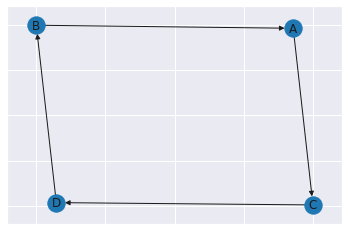

In [ ]:
# ranking Q3
import networkx as nx
from math import gcd
from functools import reduce

G = nx.DiGraph()
G.add_edges_from([('A', 'C'), ('C', 'D'), ('D', 'B'), ('B', 'A'), ('D', 'D')])
cycles = list(nx.algorithms.cycles.simple_cycles(G))
cycles_sizes = [len(c) for c in cycles]
cycles_gcd = reduce(gcd, cycles_sizes)
is_periodic = cycles_gcd > 1
print("is_periodic: {}".format(is_periodic))

import matplotlib.pyplot as plt
nx.draw_networkx(G, with_labels=True)
plt.show()